# OOP:面向对象编程

[OOP的理解](https://zh.wikipedia.org/wiki/%E9%9D%A2%E5%90%91%E5%AF%B9%E8%B1%A1%E7%A8%8B%E5%BA%8F%E8%AE%BE%E8%AE%A1)

- 构建自己的类型来模拟真实世界的对象
- 处理抽象对象
- 容易复用和扩展
- 理解其他 OPP 代码
- GUI 通常使用 OPP 规则编写
- ...

## 一个类的案例：使用 OOP 对森林火灾建模

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### 对森林建模

In [36]:
class Forest(object):
    def __init__(self, size=(150, 150), p_sapling=0.0025, p_lightning=5.e-6, name=None):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.forest_fires = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        if name is not None:
            self.name = name
        else:
            self.name = self.__class__.__name__

    @property
    def num_cells(self):
        return self.size[0] * self.size[1]

    @property
    def tree_fraction(self):
        return self.trees.sum() / float(self.num_cells)

    @property
    def fire_fraction(self):
        return self.forest_fires.sum() / float(self.num_cells)

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

    def grow_trees(self):
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

    def start_fires(self):
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.forest_fires[lightning_strikes] = True
        
    def burn_trees(self):
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.forest_fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.forest_fires] = False
        self.forest_fires = new_fires

    def _rand_bool(self, p):
        return np.random.uniform(size=self.trees.shape) < p

定义一个森林类之后，我们创建一个新的森林类对象：

In [37]:
forest = Forest()

In [38]:
# 显示当前的状态：
print (forest.trees)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [39]:
print (forest.forest_fires)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


使用 `matshow` 进行可视化：

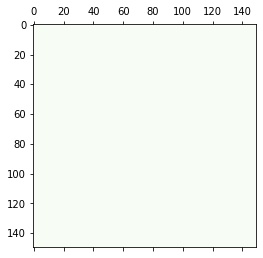

In [40]:
plt.matshow(forest.trees, cmap=plt.cm.Greens)

plt.show()

### 模拟森林生长和火灾的过程

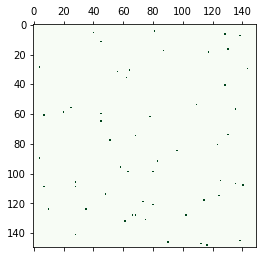

In [41]:
# 经过一段时间：
forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
plt.show()

0.23004444444444444


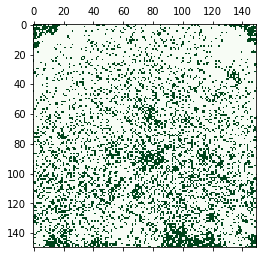

In [42]:
# 循环很长时间：
for i in range(500):
    forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
print (forest.tree_fraction)

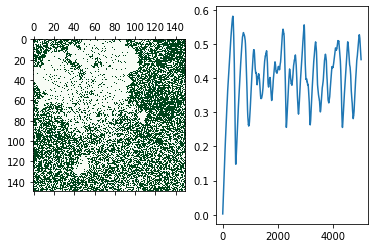

In [43]:
# 迭代更长时间：
forest = Forest()
tree_fractions = []
for i in range(5000):
    forest.advance_one_step()
    tree_fractions.append(forest.tree_fraction)
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax0.matshow(forest.trees, cmap=plt.cm.Greens)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(tree_fractions)

plt.show()

## 什么是对象？

在 `Python` 中，几乎所有的东西都是对象。

整数是对象：

In [3]:
a = 257
type(a)

int

In [4]:
id(a)

88627056

`b` 和 `a` 是同一个对象：

In [5]:
b=a
id(b)

88627056

函数：

In [6]:
def foo():
    print(1)

type(foo)

function

In [7]:
id(foo)

91065200

`type` 函数本身也是对象：

In [8]:
type(type)

type

In [9]:
id(type)

8791226862496

只有一些保留的关键词不是对象：

In [10]:
type(else)

SyntaxError: invalid syntax (<ipython-input-10-f7af22456537>, line 1)

## 定义 class

### 基本形式

`class` 定义如下：

```python
class ClassName(ParentClass):
    """class docstring"""
    def method(self):
        return
```

- `class` 关键词在最前面
- `ClassName` 通常采用 `CamelCase` 记法
- 括号中的 `ParentClass` 用来表示继承关系
- 冒号不能缺少
- `""""""` 中的内容表示 `docstring`，可以省略
- 方法定义与函数定义十分类似，不过多了一个 `self` 参数表示这个对象本身
- `class` 中的方法要进行缩进

In [20]:
class Forest(object):
    """ Forest can grow trees which eventually die."""
    pass
    def chen_t():
        return 1

其中 `object` 是[最基本的类型](https://my.oschina.net/zhengtong0898/blog/636468)。

查看帮助：

In [21]:
import numpy as np
np.info(Forest)

 Forest()

Forest can grow trees which eventually die.


Methods:

  chen_t  --  None


In [22]:
forest = Forest()
forest

### 添加属性和方法

* 属性：属性是与对象绑定的一组数据，可以只读，只写，或者读写，使用时不加括号;
* 方法：方法是与属性绑定的一组函数，需要使用括号，作用于对象本身。

可以直接添加属性（有更好的替代方式）：

In [28]:
forest.trees = np.zeros((150, 150), dtype=bool)

In [29]:
forest.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
forest2 = Forest()

`forest2` 没有这个属性：

In [31]:
forest2.trees

AttributeError: 'Forest' object has no attribute 'trees'

添加方法时，默认第一个参数是对象本身，一般为 `self`，可能用到也可能用不到，然后才是其他的参数：

In [33]:
class Forest(object):
    """ Forest can grow trees which eventually die."""
    def grow(self):
        print ("the tree is growing!")
        
    def number(self, num=1):
        if num == 1:
            print ('there is 1 tree.')
        else:
            print ('there are', num, 'trees.')

In [34]:
forest = Forest()

forest.grow()
forest.number(12)

the tree is growing!
there are 12 trees.


## 特殊方法

**Python** 使用 `__` 开头的名字来定义特殊的方法和属性，它们有：

- `__init__()`
- `__repr__()`
- `__str__()`
- `__call__()`
- `__iter__()`
- `__add__()`
- `__sub__()`
- `__mul__()`
- `__rmul__()`
- `__class__`
- `__name__`

### 构造方法 `__init__()`

之前说到，在产生对象之后，我们可以向对象中添加属性。事实上，还可以通过构造方法，在构造对象的时候直接添加属性：

In [44]:
class Leaf(object):
    """
    A leaf falling in the woods.
    """
    def __init__(self, color='green'):
        self.color = color

In [45]:
# 默认属性值：
leaf1 = Leaf()

print (leaf1.color)

green


In [46]:
# 传入有参数的值：
leaf2 = Leaf('orange')

print (leaf2.color)

orange


回到森林的例子：

In [47]:
import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self):
        self.trees = np.zeros((150,150), dtype=bool)
        self.fires = np.zeros((150,150), dtype=bool)

我们在构造方法中定义了两个属性 `trees` 和 `fires`：

In [48]:
forest = Forest()

forest.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [49]:
forest.fires

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [50]:
# 修改属性的值：
forest.trees[0,0]=True
forest.trees

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

改变它的属性值不会影响其他对象的属性值：

In [51]:
forest2 = Forest()

forest2.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

事实上，`__new__()` 才是真正产生新对象的方法，`__init__()` 只是对对象进行了初始化，所以：

```python
leaf = Leaf()
```

相当于

```python
my_new_leaf = Leaf.__new__(Leaf)
Leaf.__init__(my_new_leaf)
leaf = my_new_leaf
```

### 表示方法 `__repr__()` 和 `__str__()`

In [52]:
class Leaf(object):
    """
    A leaf falling in the woods.
    """
    def __init__(self, color='green'):
        self.color = color
    def __str__(self):
        "This is the string that is printed."
        return "A {} leaf".format(self.color)
    def __repr__(self):
        "This string recreates the object."
        return "{}(color='{}')".format(self.__class__.__name__, self.color)

`__str__()` 是使用 `print` 函数显示的结果：

In [53]:
leaf = Leaf()

print (leaf)

A green leaf


`__repr__()` 返回的是不使用 `print` 方法的结果：

In [54]:
leaf

Leaf(color='green')

回到森林的例子：

In [55]:
import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150)):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__

In [56]:
forest = Forest()

`__str__()` 方法：

In [57]:
print(forest)

Forest


`__repr__()` 方法：

In [58]:
forest

Forest(size=(150, 150))

`__name__` 和 `__class__` 为特殊的属性：

In [59]:
forest.__class__

__main__.Forest

In [61]:
# forest实例对应的类的名字
forest.__class__.__name__

'Forest'

### 特殊方法 `__class__`

通过 `__class__` 可以实现实例之间的通信，也就是说 `__class__` 属于通用的类本身的方法。

当一个类中的某个成员变量是所有该类的对象的公共变量时,可以用到__class__。

[参考](https://luobuda.github.io/2015/01/16/python-class/)

In [75]:
class A(object):
    count = 0
    def __init__(self):
        self.__class__.count += 1

In [76]:
for i in range(5): 
    print(A().count)

1
2
3
4
5
